In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
data=pd.read_csv("yelp.csv")
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
data.shape

(10000, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
data.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [6]:
data=data.drop({"business_id","date","review_id","type","user_id","cool","useful","funny"},1)

In [7]:
data.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [8]:
data["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [9]:
data["stars"].replace({5:1,4:1,3:0,2:0,1:0},inplace=True)

In [10]:
data['length'] = data['text'].apply(len)
data.head()

,stars,text,length
0,1,My wife took me here on my birthday for breakf...,889
1,1,I have no idea why some people give bad review...,1345
2,1,love the gyro plate. Rice is so good and I als...,76
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,1,General Manager Scott Petello is a good egg!!!...,469


In [11]:
x=np.array(data["text"])
y=np.array(data["stars"])

In [12]:
x

array(['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!',
       'I have no idea why some people give bad reviews about this place. It goes to show 

In [13]:
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

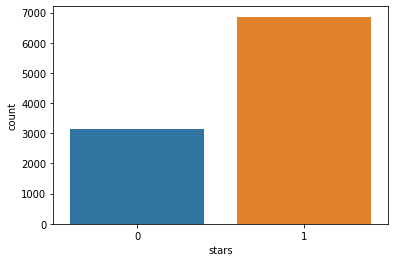

In [14]:
sb.countplot(data["stars"])

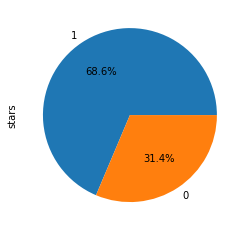

In [15]:
data["stars"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [19]:
train_data = count_vector.fit_transform(x_train)

test_data = count_vector.transform(x_test)

In [20]:
train_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
test_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model=MultinomialNB()
model.fit(train_data,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
test_data

<3000x24924 sparse matrix of type '<class 'numpy.int64'>'
	with 242554 stored elements in Compressed Sparse Row format>

In [25]:
y_test[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [26]:
pred=model.predict(test_data)
pred[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [27]:
model.score(test_data,y_test)

0.8226666666666667

In [28]:
model.score(train_data,y_train)

0.9148571428571428

In [29]:
x_test.shape

(3000,)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 580,  353],
       [ 179, 1888]], dtype=int64)

In [31]:
# after balancing the data#

In [32]:
data.head()

,stars,text,length
0,1,My wife took me here on my birthday for breakf...,889
1,1,I have no idea why some people give bad review...,1345
2,1,love the gyro plate. Rice is so good and I als...,76
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,1,General Manager Scott Petello is a good egg!!!...,469


In [33]:
dataa=data

In [34]:
dataa.head()

,stars,text,length
0,1,My wife took me here on my birthday for breakf...,889
1,1,I have no idea why some people give bad review...,1345
2,1,love the gyro plate. Rice is so good and I als...,76
3,1,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",419
4,1,General Manager Scott Petello is a good egg!!!...,469


In [35]:
dataa["stars"].value_counts()

1    6863
0    3137
Name: stars, dtype: int64

In [36]:
ham=dataa[dataa['stars']==1][:3137]
spam=data[data['stars']==0]
ham.shape,spam.shape

((3137, 3), (3137, 3))

In [37]:
newdata=pd.concat([ham,spam])
newdata=newdata.sample(frac=1,random_state=40)
newdata.head()

,stars,text,length
3603,0,"Wow, it must be a first-time mall experience f...",743
9157,0,Food is good. Don't take kids though.\nKids pa...,79
1784,0,Well....it is what you can expect from airport...,365
3375,1,Surprisingly good! I tried the strawberry lem...,238
1479,1,Lived in house for 9 years and just thought wa...,476


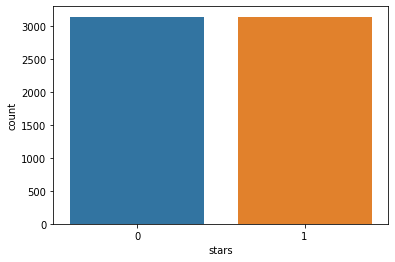

In [38]:
sb.countplot(x='stars',data=newdata)

In [39]:
X=np.array(newdata['text'])
X

array(["Wow, it must be a first-time mall experience for the reviewer before me.  Five stars for Arrowhead?  Are you kidding?\n\nI find this mall to be average and boring with many middle of the road stores (Dillards, Sears, Gap, Tilly's, Forever 21) you can find elsewhere at other Westcor malls in the Valley.   \n\nNothing really strikes me as distinctive at this mall - other than the fact that it's the nicer of two indoor shopping malls on the Westside.  So for 500,000 people this is the only game in town unless they're willing to drive east.\n\nThe store mix and food court are pretty typical.  In fact, I rarely go here unless I am in the area, need socks or undershirts and/or I'm trying to avoid the lines of the other Arrowhead Paradise Bakery.",
       "Food is good. Don't take kids though.\nKids pasta was $7 with no accompaniments.",
       'Well....it is what you can expect from airport food.  Not that great but not terrible.  All I wanted was a simple sandwhich to take on the pl

In [40]:
Y=np.array(newdata['stars'])
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [43]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [44]:
train_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
model=MultinomialNB()
model.fit(train_data,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
pred=model.predict(test_data)
pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
model.score(test_data,Y_test)

0.8047808764940239

In [49]:
model.score(train_data,Y_train)

0.9145248057381948